┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                             ┃
┃            Ex_02            ┃
┃                             ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  -Número de ciclos >        ┃
┃     - 16                    ┃
┃  -Amplitude média >         ┃
┃     - 149.6269              ┃
┃  -Periodo >                 ┃
┃     - 6.2832                ┃
┃                             ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


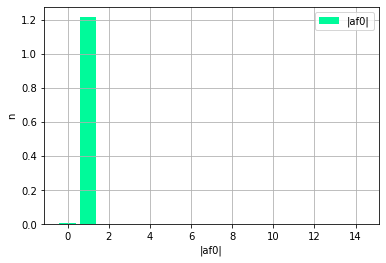

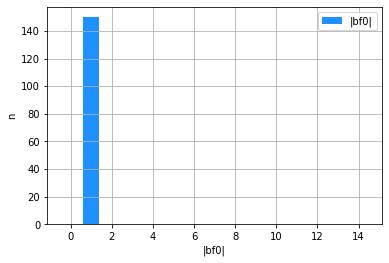

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ERRADO, A TEM DE SER MAIOR QUE B

def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# @author: vitor.torres

    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf



# Arrays precisos
# array com 1000 zeros
ind = np.transpose([0 for i in range(1000)])
countMax = 0
ampl = 0
af0 = np.empty(15)
bf0 = np.empty(15)


# Gravidade
g = 9.8

# Massa
m = 1
k = 1
b = 0.05
a = 0.002
f0 = 7.5
wf = 1

# Tempo inicial e final
ti = 0
tf = 300

# Velocidade terminal
vtx = 6.8

# Posição e Velocidade inicial
xx0 = 0
vx0 = 0

# dt incremento do tempo e n numero de intervalos
dt = 0.001
n = int((tf - ti) / dt)



# Vetor tempo (n+1 para garantir que nao falta o ultimo dado (Ex: t[10]))
t = np.linspace(ti, tf, n + 1)

# Vetor velocidade (empty e não zeros para não alterar 
# muito o resultado se faltar analisar um dado)
Emec = np.empty(n + 1)
xx = np.empty(n + 1)
vx = np.empty(n + 1)
ax = np.empty(n + 1)

# Introduzir x0 e v0 nos vetores da posição e velocidade
xx[0] = xx0
vx[0] = vx0

# Soma das amplitudes máximas sao máximas (x[i-1] < x[i] > x[i-1])
amps = 0
# Array de tempos (o seu tamanho é o número de amplitudes máximas encontradas (para fazer a média))
nAmps = []

periodoArray = []

# Preencher os vetores x, v, a
for i in range(n):    
    ax[i] = (-k * xx[i] - b * vx[i] + f0 * np.cos(wf * t[i])) / m
    vx[i + 1] = vx[i] + ax[i] * dt
    xx[i + 1] = xx[i] + vx[i + 1] * dt
    
    Emec[i] = 0.5 * m * vx[i]**2 + 0.5 * k  * xx[i]**2
    
    # Somar as amplitudes médias encontradas e incrementar o número destas encontradas
    #                                                 t > 200s para ser regime estacionário (mais ou menos)
    if (xx[i - 1] < xx[i]) and (xx[i] > xx[i + 1]) and (t[i] > 200):
        amps += xx[i]
        nAmps.append(t[i])
        countMax = countMax + 1 # num de maximos
        ind[countMax] = int(i)  # guardar os "i" de picos (numerados com countMax) (ex: pico[1] == 0.123...)
        
t0 = ind[countMax - 1]
t1 = ind[countMax]
for i in range(15):
    af, bf = abfourier(t, xx, t0, t1, i)
    af0[i] = af
    bf0[i] = bf
    
        
for i in range(1, len(nAmps)):
    periodoArray.append(nAmps[i] - nAmps[i-1])
    
    
# Periodo = soma dos periodos / numero destes encontradas
periodo = sum(periodoArray) / len(periodoArray)
        
# Amplitude = soma das amplitudes / numero destas encontradas
amplitude = amps / len(nAmps)
    

print("┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓")
print("┃                             ┃")
print("┃            Ex_02            ┃")
print("┃                             ┃")
print("┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫")
print("┃  -Número de ciclos >        ┃")
print("┃     - %-8s              ┃" % len(nAmps))
print("┃  -Amplitude média >         ┃")
print("┃     - %-8s              ┃" % np.round(amplitude, 4))
print("┃  -Periodo >                 ┃")
print("┃     - %-8s              ┃" % np.round(periodo, 4))
print("┃                             ┃")
print("┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛")

ii = np.linspace(0, 14, 15)

# Plot
plt.bar(ii, np.abs(af0), label="|af0|",  linestyle='-', linewidth=3, color="mediumspringgreen")
plt.xlabel("|af0|")
plt.ylabel("n")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()

plt.bar(ii, np.abs(bf0), label="|bf0|",  linestyle='-', linewidth=3, color="dodgerblue")
plt.xlabel("|bf0|")
plt.ylabel("n")
plt.legend()         # Legenda só aparece com isto
plt.grid()
plt.show()
    
    